Demograph

In [ ]:
11 mod 12

: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [2]:
path_participants = 'D:/数据迁移/TUD/VCP/VAST-Challenge-2022/Datasets/Attributes'
participants = pd.read_csv('./Participants.csv')
participants.head()



,participantId,householdSize,haveKids,age,educationLevel,interestGroup,joviality
0,0,3,True,36,HighSchoolOrCollege,H,0.001627
1,1,3,True,25,HighSchoolOrCollege,B,0.328087
2,2,3,True,35,HighSchoolOrCollege,A,0.393470
3,3,3,True,21,HighSchoolOrCollege,I,0.138063
4,4,3,True,43,Bachelors,H,0.857397


In [3]:
participants.describe()

,participantId,householdSize,age,joviality
count,1011.000000,1011.000000,1011.000000,1011.000000
mean,505.000000,1.964392,39.074184,0.493794
std,291.994863,0.793986,12.379296,0.291351
min,0.000000,1.000000,18.000000,0.000204
25%,252.500000,1.000000,29.000000,0.240074
50%,505.000000,2.000000,39.000000,0.477539
75%,757.500000,3.000000,50.000000,0.746819
max,1010.000000,3.000000,60.000000,0.999234


In [4]:
participants.age.describe()

count    1011.000000
mean       39.074184
std        12.379296
min        18.000000
25%        29.000000
50%        39.000000
75%        50.000000
max        60.000000
Name: age, dtype: float64

In [5]:
type(participants.age)

pandas.core.series.Series

In [28]:
np.linspace(18,60,7)

array([18., 25., 32., 39., 46., 53., 60.])

In [96]:
age_num = []
bins=[18,25,32,39,46,53,61]
# Discretized data by segment
segments=pd.cut(participants.age, bins, right=False)
# Counte the number of people in each section
counts=pd.value_counts(segments,sort=False)
print(counts)

[18, 25)    165
[25, 32)    171
[32, 39)    165
[39, 46)    152
[46, 53)    170
[53, 61)    188
Name: age, dtype: int64


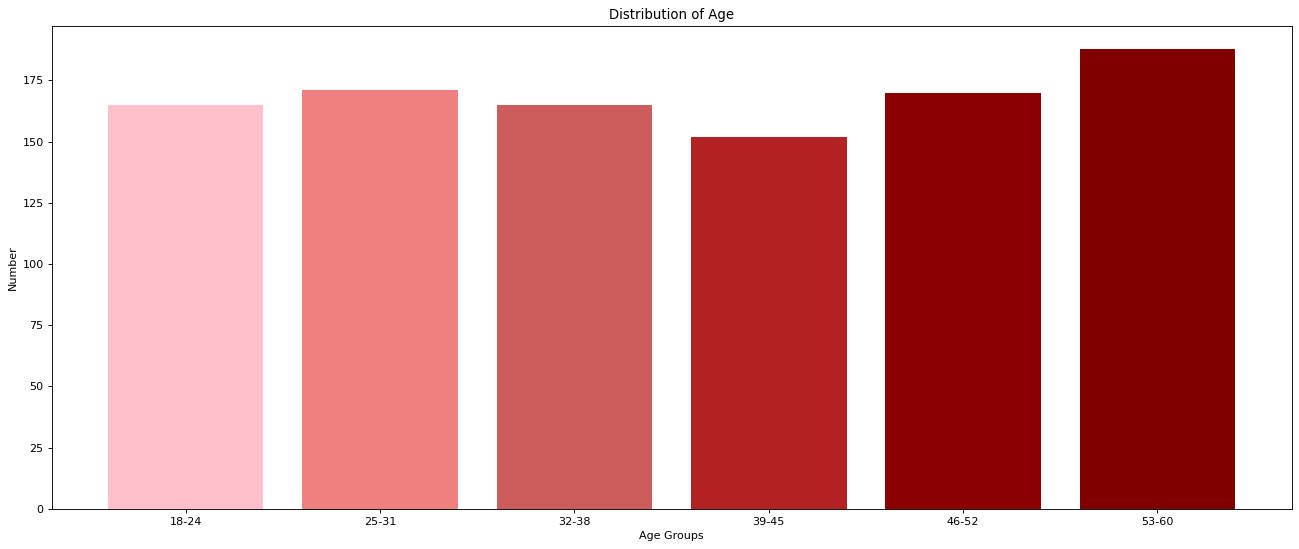

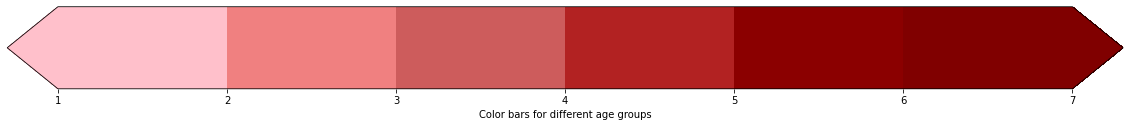

In [121]:
import matplotlib as mpl
import json
age_num = []
bins=[18,25,32,39,46,53,61]
# Discretized data by segment
segments=pd.cut(participants.age, bins, right=False)
# Counte the number of people in each section
counts=pd.value_counts(segments,sort=False)
labels = ['18-24', '25-31', '32-38', '39-45', '46-52','53-60']

colors = ['pink', 'lightcoral', 'indianred', 'firebrick', 'darkred', 'maroon']
# plot
plt.figure(figsize=(20, 8), dpi=80)
plt.title("Distribution of Age")
plt.ylabel("Number")
plt.xlabel("Age Groups")
#plt.grid(linestyle="--", alpha=1)
b=plt.bar(labels,counts,color=colors)
plt.show()

fig, ax = plt.subplots(figsize=(20, 3))
fig.subplots_adjust(bottom=0.5)
cmap = mpl.colors.ListedColormap(colors)
bounds = [1, 2, 3, 4, 5, 6, 7]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=ax,
    boundaries=[0] + bounds + [13],  # Adding values for extensions.
    extend='both',
    ticks=bounds,
    spacing='proportional',
    orientation='horizontal',
    label='Color bars for different age groups',
)

rgb_values = []
for color in colors:
    rgb_values.append(mpl.colors.to_rgb(color))
rgb_values

age_rbg_dir = {'18-24':[1.0, 0.7529411764705882, 0.796078431372549],
                '25-31':[0.9411764705882353, 0.5019607843137255, 0.5019607843137255],
                '32-38':[0.803921568627451, 0.3607843137254902, 0.3607843137254902],
                '39-45':[0.6980392156862745, 0.13333333333333333, 0.13333333333333333],
                '46-52':[0.5450980392156862, 0.0, 0.0],
                '53-60':[0.5019607843137255, 0.0, 0.0]}
age_rbg_json = json.dumps(age_rbg_dir)


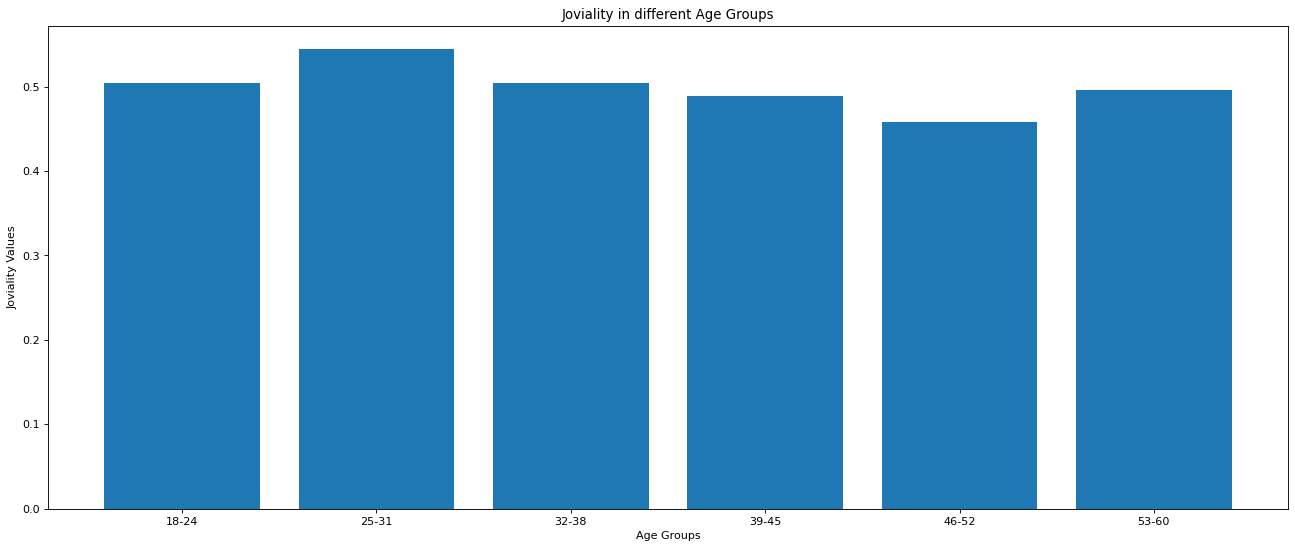

In [188]:
i = 18
joviality_mean = []
while(i <= 46):
    age_interval =  (i <= participants.age) & (participants.age <= i + 6)
    joviality = participants[(age_interval)]['joviality']
    mean = joviality.mean()
    joviality_mean.append(mean)
    i += 7

joviality_mean.append(participants[(53 >= participants.age) & (participants.age <= 60)]['joviality'].mean())
joviality_mean = np.asarray(joviality_mean)
labels = ['18-24', '25-31', '32-38', '39-45', '46-52','53-60']

# plot
plt.figure(figsize=(20, 8), dpi=80)
plt.title("Joviality in different Age Groups")
plt.ylabel("Joviality Values")
plt.xlabel("Age Groups")
#plt.grid(linestyle="--", alpha=1)
b=plt.bar(labels,joviality_mean)
plt.show()


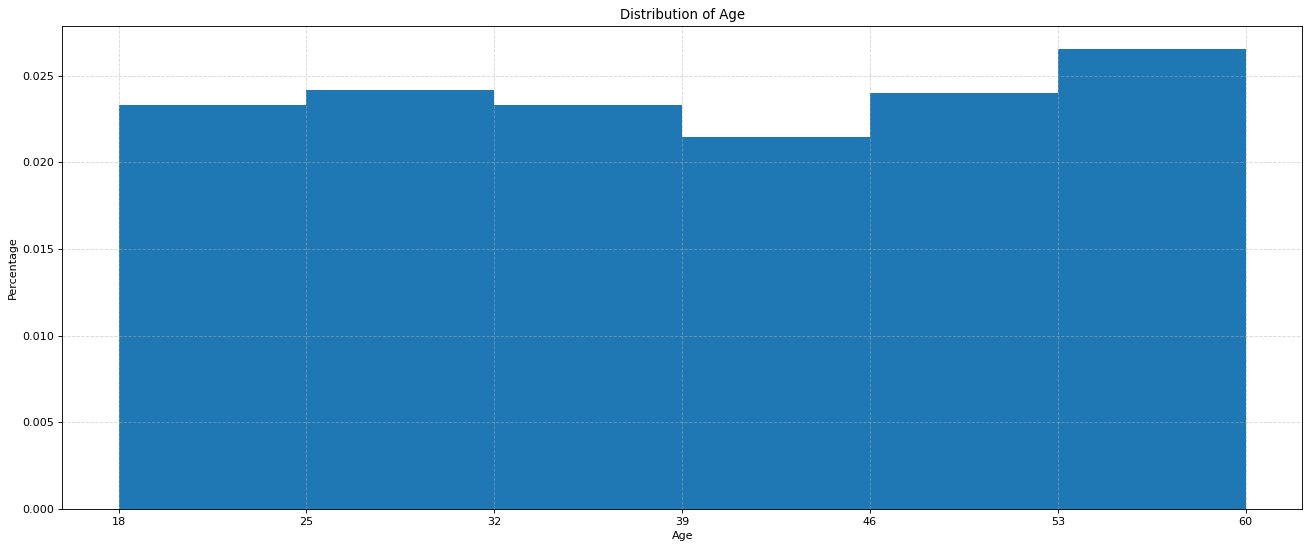

In [75]:
# Distribution of age
# 1. data: participants.age
# 2. canvas
plt.figure(figsize=(20, 8), dpi=80)

# 3、plot histogramm
distance = 7
group_num = int((max(participants.age) - min(participants.age)) / distance)
plt.hist(participants.age, bins=group_num, density=True)

# sticks, label, title, grid
plt.xticks(range(min(participants.age), max(participants.age) + 2, distance))
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.grid(linestyle="--", alpha=0.5)

plt.show()

In [10]:
participants.joviality.describe()

count    1011.000000
mean        0.493794
std         0.291351
min         0.000204
25%         0.240074
50%         0.477539
75%         0.746819
max         0.999234
Name: joviality, dtype: float64

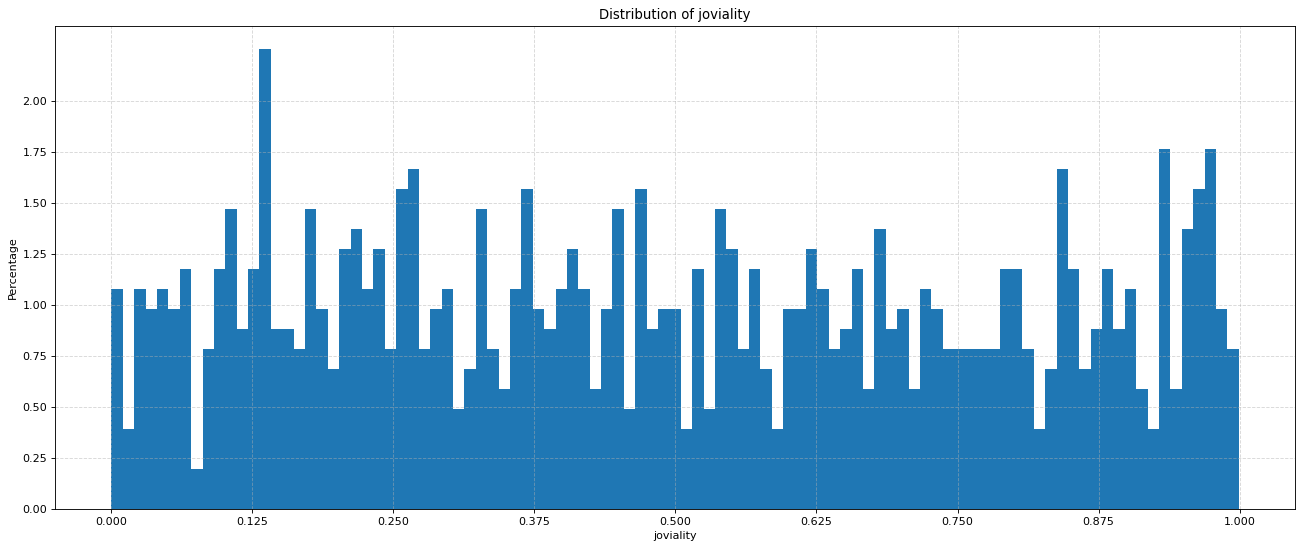

In [11]:
# Distribution of joviality
# 1. data: participants.joviality
# 2. canvas
plt.figure(figsize=(20, 8), dpi=80)

# 3、plot histogramm
distance = 0.01
group_num = int((max(participants.joviality) - min(participants.joviality)) / distance)
plt.hist(participants.joviality, bins=group_num, density=True)

# ticks, labels, title, grid
plt.xticks(np.linspace(0,1,9))
plt.yticks(np.linspace(0,2,9))
plt.title("Distribution of joviality")
plt.xlabel("joviality")
plt.ylabel("Percentage")
plt.grid(linestyle="--", alpha=0.5)

plt.show()

In [182]:
print(participants.educationLevel)


0       HighSchoolOrCollege
1       HighSchoolOrCollege
2       HighSchoolOrCollege
3       HighSchoolOrCollege
4                 Bachelors
               ...         
1006    HighSchoolOrCollege
1007    HighSchoolOrCollege
1008               Graduate
1009                    Low
1010    HighSchoolOrCollege
Name: educationLevel, Length: 1011, dtype: object


In [13]:

#age_edu = participants.groupby('educationLevel')['age'].value_counts()
#less_than_zero = list(filter(lambda x: x < 0, number_list))
age_edu = participants.loc[:, ['educationLevel','age']]
age_edu

,educationLevel,age
0,HighSchoolOrCollege,36
1,HighSchoolOrCollege,25
2,HighSchoolOrCollege,35
3,HighSchoolOrCollege,21
4,Bachelors,43
...,...,...
1006,HighSchoolOrCollege,19
1007,HighSchoolOrCollege,40
1008,Graduate,23
1009,Low,39


No handles with labels found to put in legend.


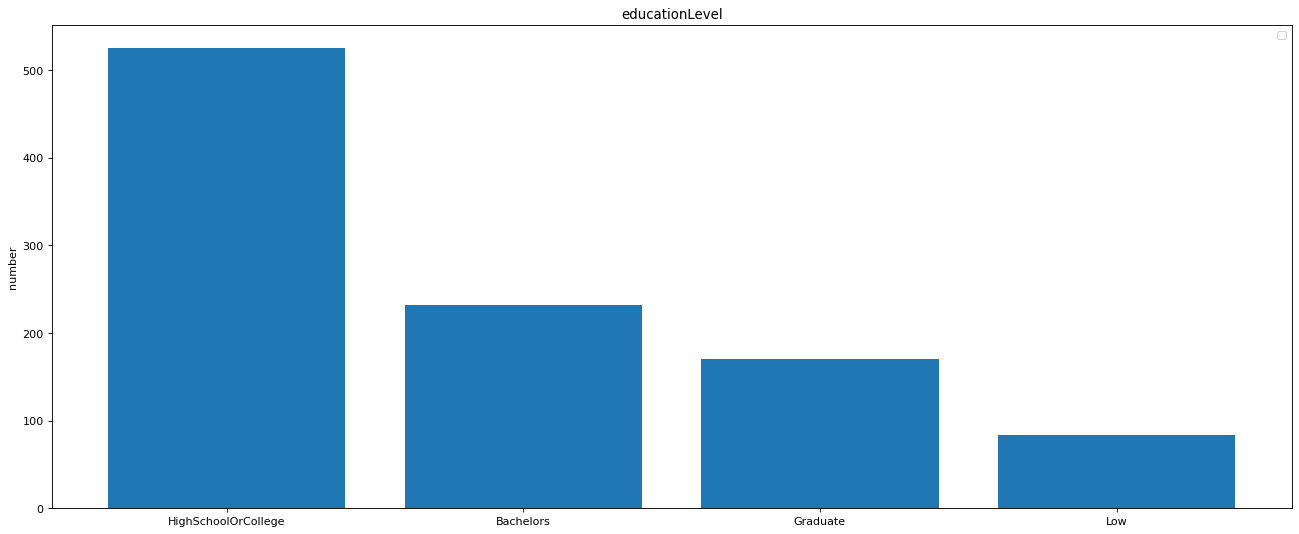

In [185]:
# 1.data
# get all the catagories of one column, educationLevel as example 
education_level = participants.groupby(by = 'educationLevel')
education_level_num = participants.educationLevel.value_counts()
education_level_labels = education_level_num.keys()
# 2.bar plot
plt.figure(figsize=(20, 8), dpi=80)
x_ticks = range(len(education_level_labels))
plt.bar(x_ticks, education_level_num)

# 3.ticks, labels, title, grid
plt.xticks(x_ticks, education_level_labels)
plt.ylabel('number')
plt.title("educationLevel")
#plt.grid(linestyle="--", alpha=0.2)
plt.legend()
plt.show()

In [184]:
educationLevel = participants.groupby(by = 'educationLevel')
educationLevel_list = list(educationLevel.groups.keys())
educationLevel_list

['Bachelors', 'Graduate', 'HighSchoolOrCollege', 'Low']

relationship between age and educational level

In [126]:
educationLevel = participants.groupby(by = 'educationLevel')
educationLevel_list = list(educationLevel.groups.keys())
educationLevel_num = participants.educationLevel.value_counts()
educationLevel_num

HighSchoolOrCollege    525
Bachelors              232
Graduate               170
Low                     84
Name: educationLevel, dtype: int64

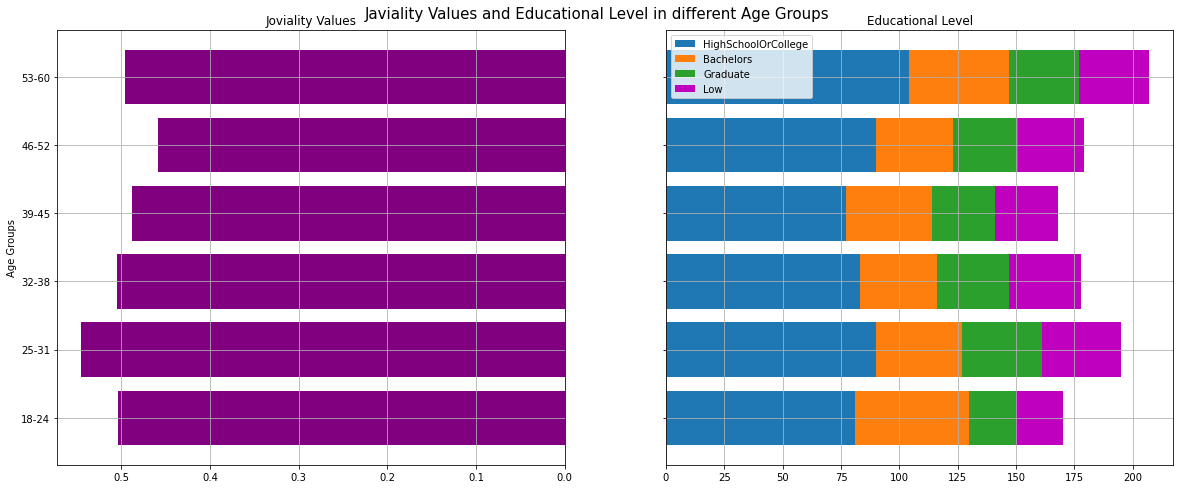

In [221]:
# Demographic data processing

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sys
import json

file_name = 'Participants.csv'
path = 'D:/数据迁移/TUD/VCP/VAST-Challenge-2022/Datasets/Attributes/' + file_name
participants = pd.read_csv(path)
participants.head()

# prepare data for educational level in different age groups
i = 18
education_level_nums = []
labels = ['18-24', '25-31', '32-38', '39-45', '46-52','53-60']
while(i <= 46):
    age_interval =  (i <= participants.age) & (participants.age <= i + 6)
    education_level_num = participants[(age_interval)].educationLevel.value_counts()
    education_level_nums.append(education_level_num)
    i += 7

education_level_num_53to60 = participants[(participants.age >= 53) & (participants.age <= 60)].educationLevel.value_counts()
education_level_nums.append(education_level_num_53to60)
education_level_nums
high_school = []
bachelors = []
graduate = []
low = []

i = 0
while(i<6):
    temp=education_level_nums[i]
    high_school.append(temp[0])
    bachelors.append(temp[1])
    graduate.append(temp[2])
    low.append(temp[3])
    i += 1

# prepare data for joviality in different age groups
i = 18
joviality_mean = []
while(i <= 46):
    age_interval =  (i <= participants.age) & (participants.age <= i + 6)
    joviality = participants[(age_interval)]['joviality']
    mean = joviality.mean()
    joviality_mean.append(mean)
    i += 7

joviality_mean.append(participants[(53 >= participants.age) & (participants.age <= 60)]['joviality'].mean())
joviality_mean = np.asarray(joviality_mean)


# plot 
labels = ['18-24', '25-31', '32-38', '39-45', '46-52','53-60']
fig, ax = plt.subplots(ncols=2, sharey=True, figsize= (20,8))
y = range(0, 6)

ax[1].barh(y, high_school,align='center',label='HighSchoolOrCollege')
ax[1].barh(y, bachelors,left=high_school, label='Bachelors')
ax[1].barh(y, graduate,left=(np.array(high_school)+np.array(bachelors)), label='Graduate')
ax[1].barh(y, graduate,left=(np.array(high_school)+np.array(bachelors)+np.array(graduate)), label='Low', color='m')
ax[1].set_title('Educational Level')
ax[1].legend()
ax[1].grid()

ax[0].set_title("Joviality Values")
ax[0].set_ylabel("Age Groups")
ax[0].barh(y,joviality_mean,color='purple')
ax[0].set(yticks=y, yticklabels = labels)
ax[0].invert_xaxis()
ax[0].grid()
title = 'Javiality Values and Educational Level in different Age Groups'
plt.figtext(.5,.9, title, fontsize=15, ha='center')
plt.show()





No handles with labels found to put in legend.


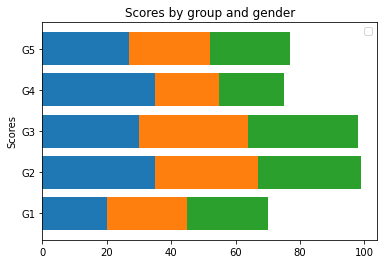

In [186]:
import matplotlib.pyplot as plt
i = 18
education_level_nums = []
while(i <= 46):
    age_interval =  (i >= participants.age) & (participants.age <= i + 6)
    education_level_num = participants[(age_interval)].educationLevel.value_counts()
    education_level_nums.append(education_level_num)
    i += 6

education_level_num_53to60 = participants[(i >= 53) & (participants.age <= 60)].educationLevel.value_counts()
education_level_nums.append(education_level_num_53to60)
labels = ['18-24', '25-31', '32-38', '39-45', '46-52','53-60']
high_school = []



labels = ['G1', 'G2', 'G3', 'G4', 'G5']



men_means = np.array([20, 35, 30, 35, 27])
women_means = np.array([25, 32, 34, 20, 25])
mix_means = [25, 32, 34, 20, 25]
w_and_m = [45,67,64,55,52]


width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, men_means,align='center')
ax.barh(labels, women_means,left=men_means)
ax.barh(labels, mix_means,left=(men_means+women_means))
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

No handles with labels found to put in legend.


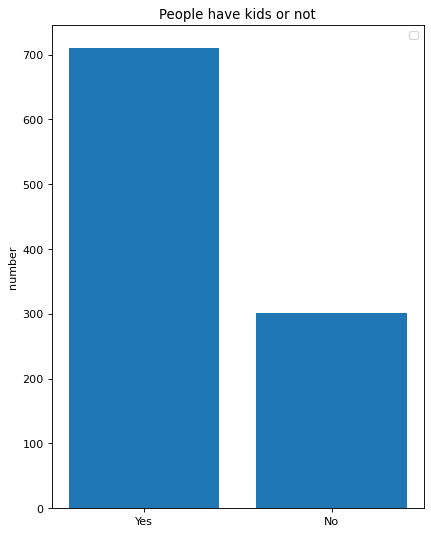

In [74]:
# 1.data
# get all the catagories of one column, educationLevel as example 
have_kids = participants.groupby(by = 'haveKids')
#have_kids_list = list(have_kids.groups.keys())
have_kids_num = participants.haveKids.value_counts()

# 2.bar plot
plt.figure(figsize=(6, 8), dpi=80)
x_ticks = range(len(have_kids))
plt.bar(x_ticks, have_kids_num)

# 3.ticks, labels, title, grid

plt.xticks(x_ticks, ['Yes', 'No'])
plt.ylabel('number')
plt.title("People have kids or not")
#plt.grid(linestyle="--", alpha=0.2)
plt.legend()
plt.show()

No handles with labels found to put in legend.


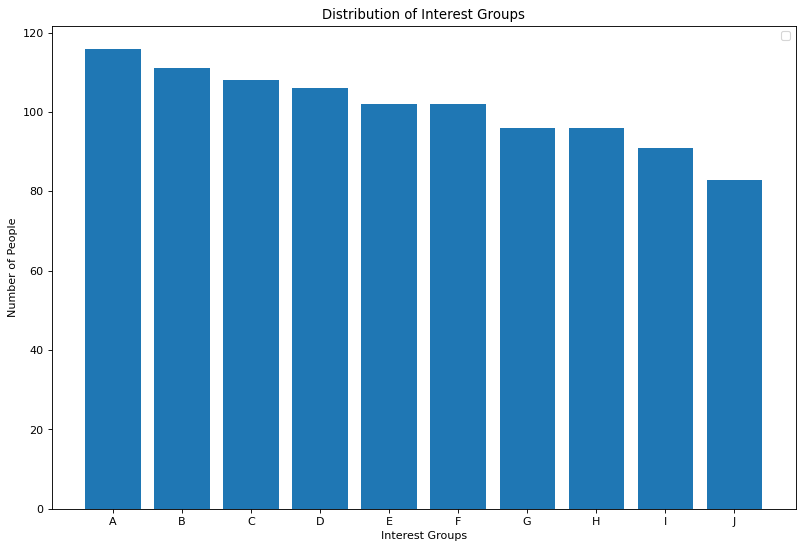

In [123]:
# 1.data
# get all the catagories of one column, educationLevel as example 
interest_group = participants.groupby(by = 'interestGroup')
interest_group_list = list(interest_group.groups.keys())
interest_group_num = participants.interestGroup.value_counts()

# 2.bar plot
plt.figure(figsize=(12, 8), dpi=80)
x_ticks = range(len(interest_group))
plt.bar(x_ticks, interest_group_num)

# 3.ticks, labels, title, grid

plt.xticks(x_ticks, interest_group_list)
plt.xlabel('Interest Groups')
plt.ylabel('Number of People')
plt.title("Distribution of Interest Groups")
#plt.grid(linestyle="--", alpha=0.2)
plt.legend()
plt.show()

relationship between interest groups and age

ValueError: shape mismatch: objects cannot be broadcast to a single shape

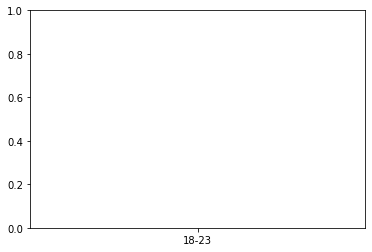

In [55]:
import matplotlib.pyplot as plt


labels = ['18-23', '24-29', '30-35', '36-41', '42-47', '48-53','54-60']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

ValueError: too many values to unpack (expected 4)

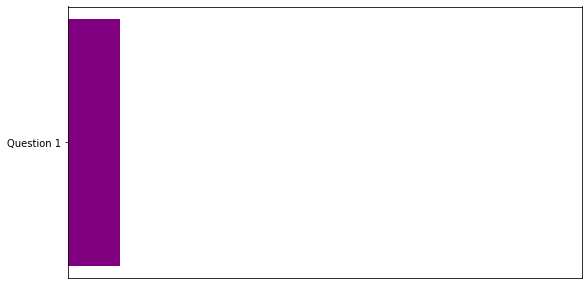

In [ ]:
category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26]}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = ['purple',
                    'magenta',
                    'fuchsia',
                    'depppink',
                    'orchid']

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()